In [1]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [13]:
iris = load_iris()

In [14]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
iris_df.shape

(150, 4)

In [6]:
from sklearn.preprocessing import StandardScaler
#Covert data into standard normal distribution
X = iris.data
X_std = StandardScaler().fit_transform(X)
print(X_std[0:15])
print("The shape of Feature Matrix is -",X_std.shape)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]
 [-0.53717756  1.47939788 -1.2833891  -1.3154443 ]
 [-1.26418478  0.78880759 -1.22655167 -1.3154443 ]
 [-1.26418478 -0.13197948 -1.34022653 -1.44707648]
 [-1.87002413 -0.13197948 -1.51073881 -1.44707648]
 [-0.05250608  2.16998818 -1.45390138 -1.3154443 ]]
The shape of Feature Matrix is - (150, 4)


In [9]:
X_covariance_matrix = np.cov(X_std.T)

In [10]:
X_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
#Compute the eigenvalues and right eigenvectors using np.linalg.eig

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)

print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#In Python, lambda is a keyword used to define anonymous functions(functions with no name) 
#and that's why they are known as lambda functions

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199996
0.9201649041624884
0.1477418210449481
0.020853862176462304


In [30]:
tot = sum(eig_vals)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

print("Variance captured by each component is \n",var_exp)

print(40 * '-')

print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


In [16]:
print("All Eigen Values along with Eigen Vectors")


print(eig_pairs)
print(40 * '-')

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

#hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.938085050199996, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624884, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449481, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462304, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------------------------------------
Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [32]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


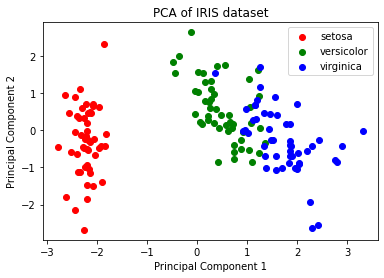

In [33]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()